Idea
Women are less likely to bike at night then men



NULL HYPOTHESIS:
The ratio of man biking at night (between 9 pm to 5:59 am) compared to women is less than or equal than man biking during the day 6 am to 8:59 pm 

In [14]:
from __future__  import print_function, division


import pylab as pl
import pandas as pd

import pandas as pd
import numpy as np
import os
import requests
import zipfile





import os
import json



In [15]:

 
os.system("wget https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip")
df = pd.read_csv('201601-citibike-tripdata.zip', compression='zip', header=0, sep=',', quotechar='"')


In [16]:
df.head()
    

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [17]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [18]:
df.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [19]:
df.columns

Index([u'starttime', u'gender'], dtype='object')

In [20]:
df.head()

,starttime,gender
0,1/1/2016 00:00:41,1
1,1/1/2016 00:00:45,1
2,1/1/2016 00:00:48,2
3,1/1/2016 00:01:06,2
4,1/1/2016 00:01:12,1


In [23]:
df['date'] = pd.to_datetime(df['starttime'])





In [24]:
df.head()

,starttime,gender,date
0,1/1/2016 00:00:41,1,2016-01-01 00:00:41
1,1/1/2016 00:00:45,1,2016-01-01 00:00:45
2,1/1/2016 00:00:48,2,2016-01-01 00:00:48
3,1/1/2016 00:01:06,2,2016-01-01 00:01:06
4,1/1/2016 00:01:12,1,2016-01-01 00:01:12


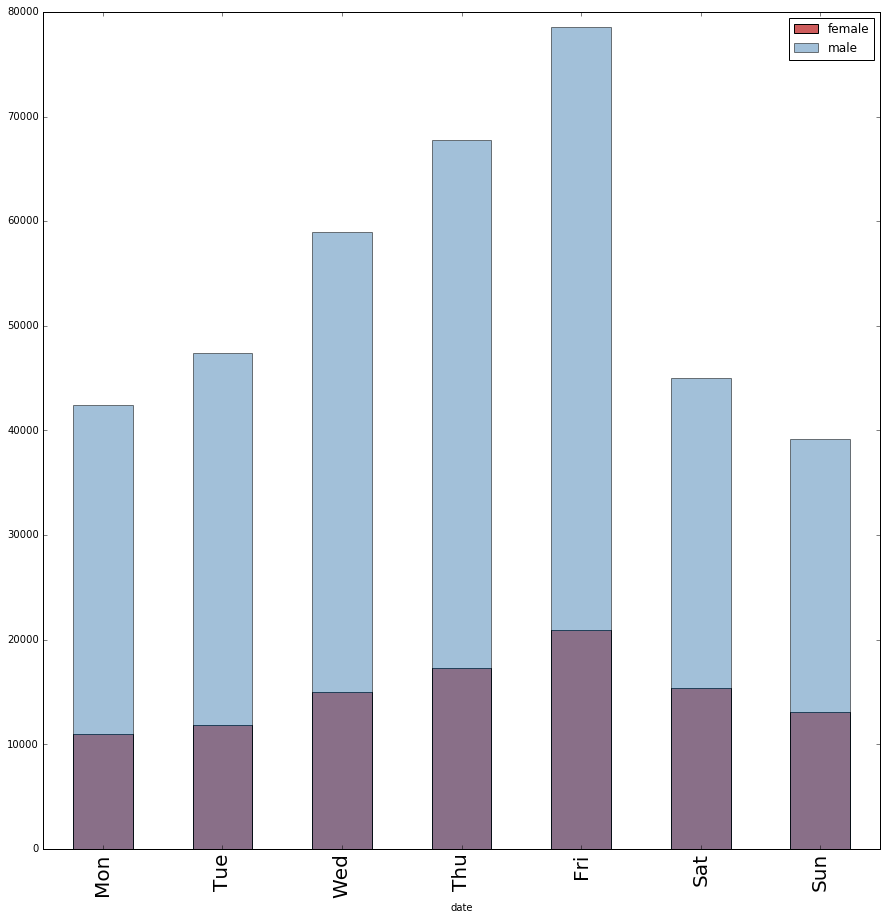

In [25]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['gender'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['date'][df['gender'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()